Step 1: Reading and Understanding the Data

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score


In [3]:
# Read the data from csv file
df = pd.read_csv('day.csv')

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
# check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# check the  tail of the dataset
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
df.index

RangeIndex(start=0, stop=730, step=1)

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# check info about columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# check the columns of the dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# checking for the null values in column data
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
# checking for the percentage of null values in column data
df.isnull().sum()/len(df)*100

,0
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


In [13]:
# checking the data types of column data.

df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [14]:
# check the shape of the dataframe

df.shape

(730, 16)

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(730, 16)

In [17]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [18]:
# Check the head of the dataset

df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
df_copy = df.copy()

In [20]:
df_copy.shape

(730, 16)

In [21]:
df_copy.drop_duplicates(inplace = True)

In [22]:
df_copy.shape

(730, 16)

As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [23]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [24]:
# Encoding/mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [25]:
# Encoding/mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [26]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [27]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [28]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


Step 2: Visualising the Data

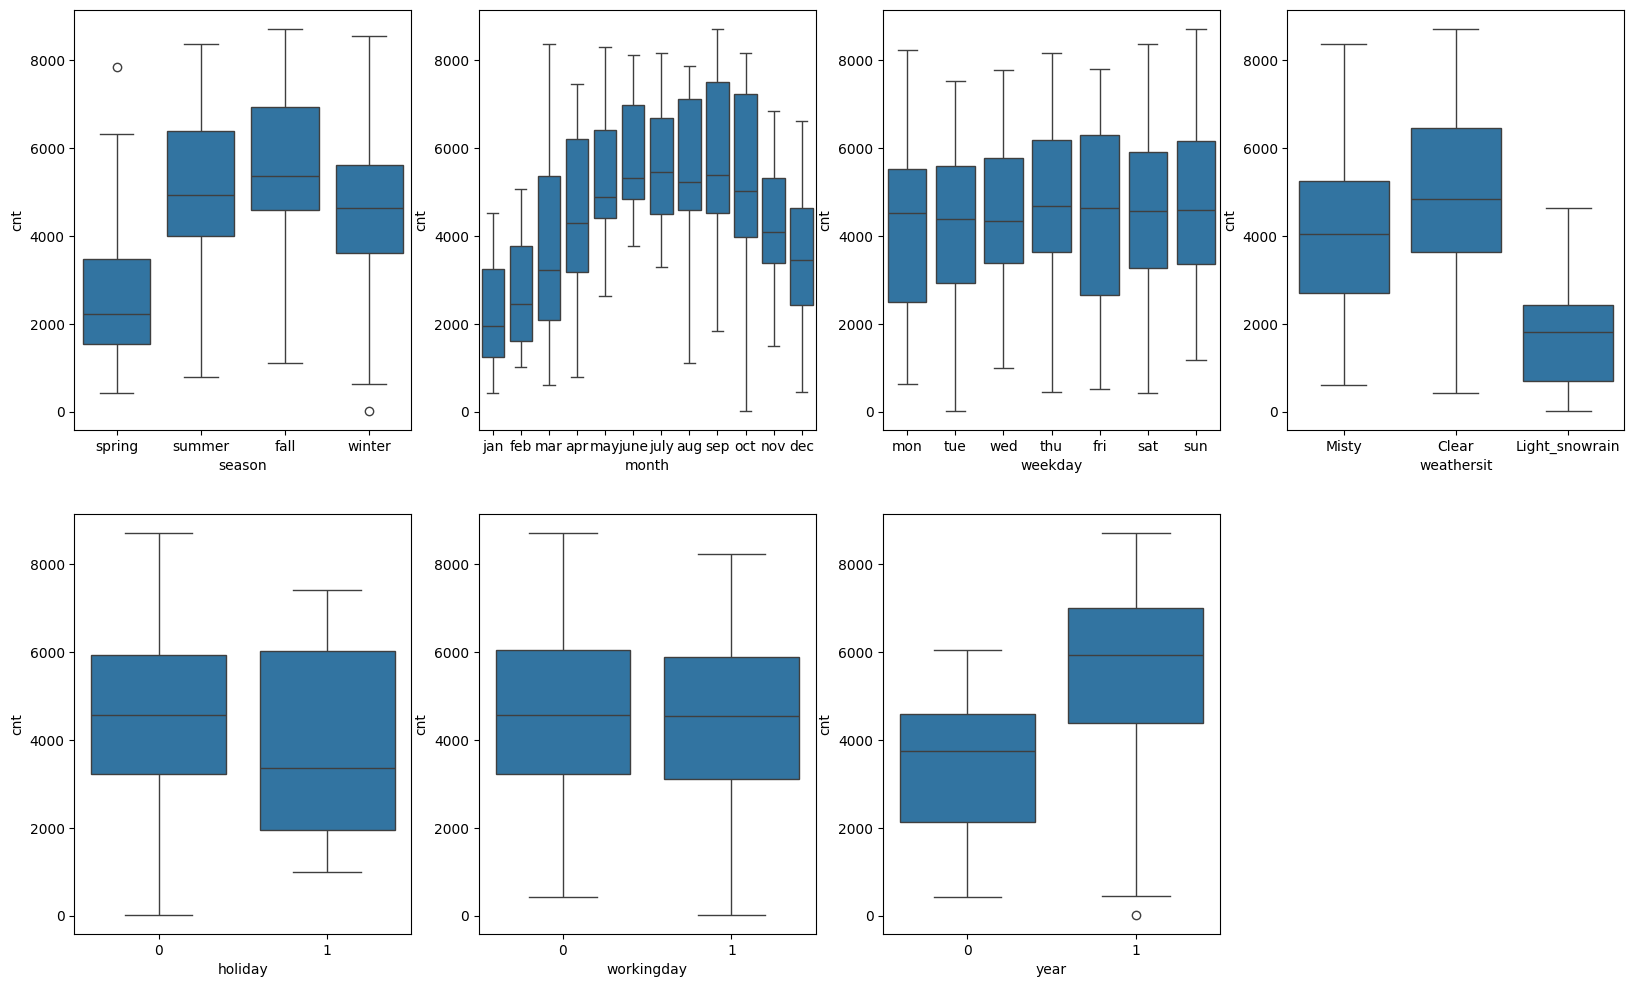

In [30]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

In [31]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

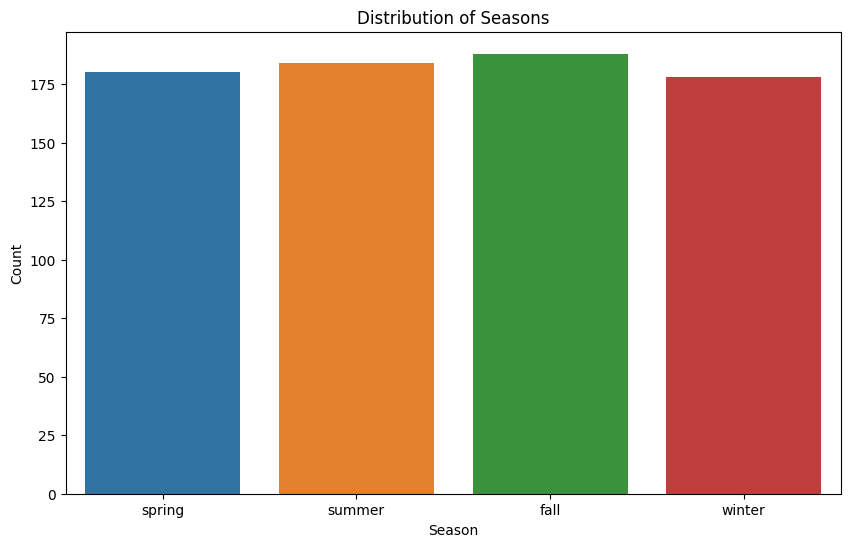

In [32]:

# plotting visualization for season column
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df, hue = 'season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

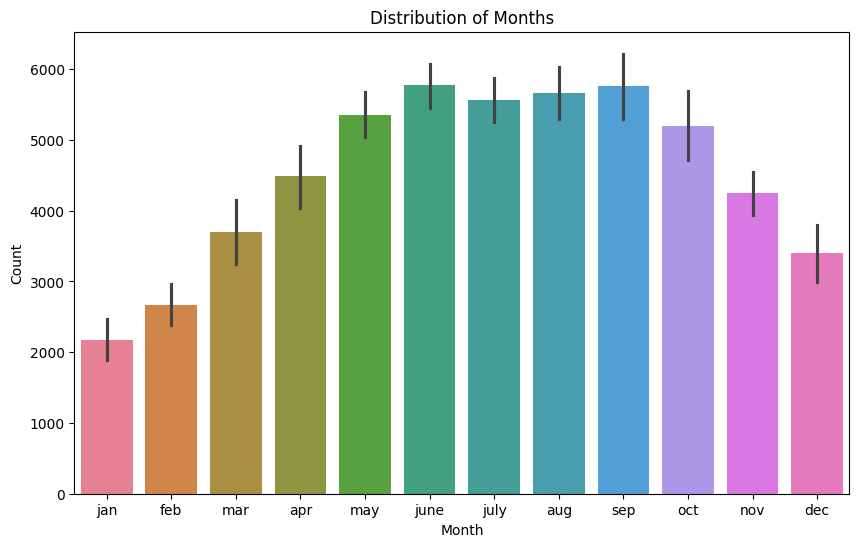

In [33]:
# plotting visualization for month column
plt.figure(figsize = [10,6])
sns.barplot(x = 'month', y = 'cnt', data = df, hue = 'month')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt. show()

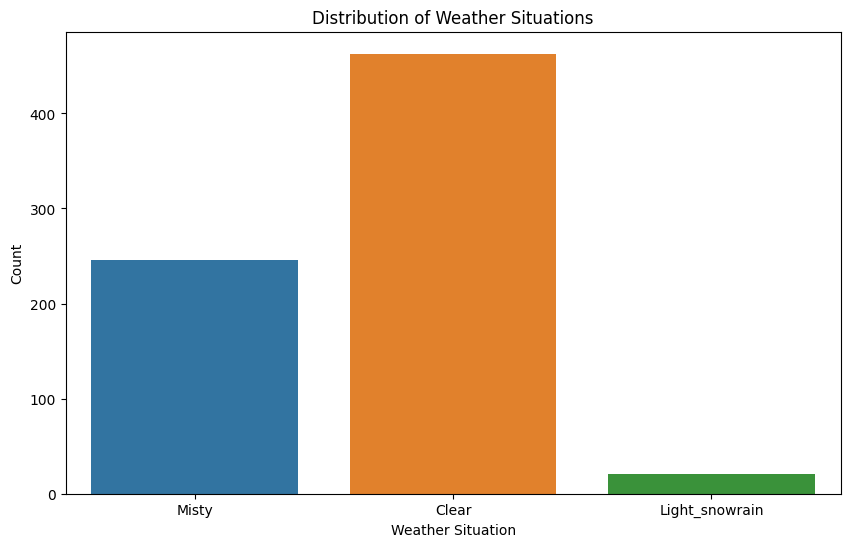

In [34]:
# plotting visualization for weathersit column
plt.figure(figsize=(10, 6))
sns.countplot(x='weathersit', data=df, hue='weathersit')
plt.title('Distribution of Weather Situations')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()

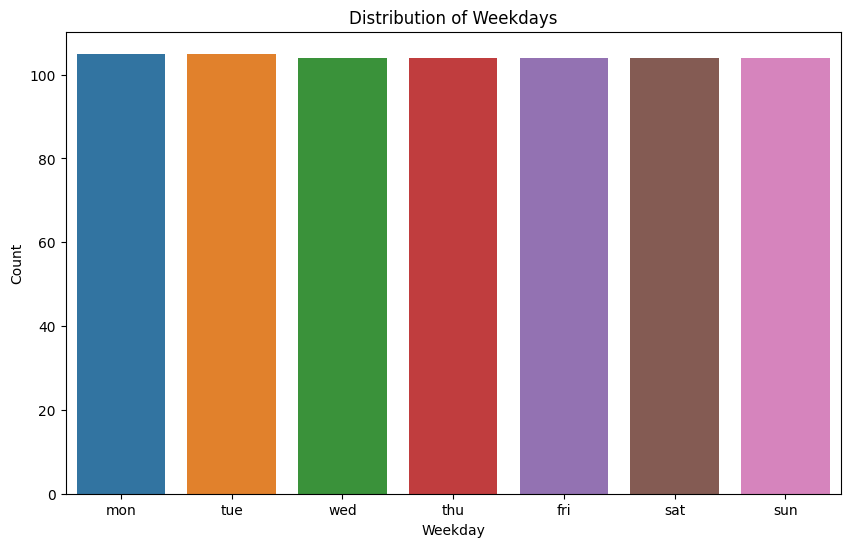

In [35]:
# plotting visualization for weekday column
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df, hue='weekday')
plt.title('Distribution of Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

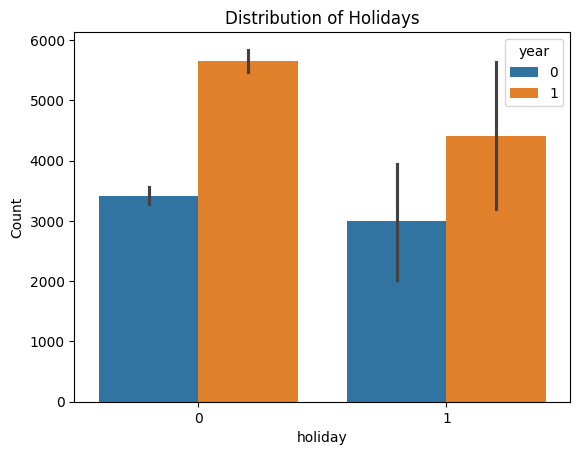

In [36]:
# plotting visualization for holiday column

sns.barplot(data = df, x = 'holiday', y = 'cnt', hue = 'year' )

plt.title('Distribution of Holidays')
plt.xlabel('holiday')
plt.ylabel('Count')
plt.show()

plt.show()

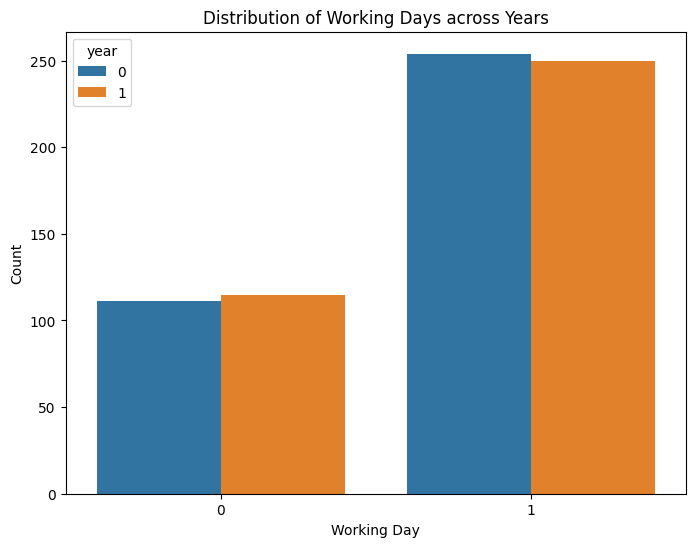

In [37]:
# Plotting visualization for workingday column
plt.figure(figsize=(8, 6))
sns.countplot(x='workingday', data=df, hue='year')
plt.title('Distribution of Working Days across Years')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()

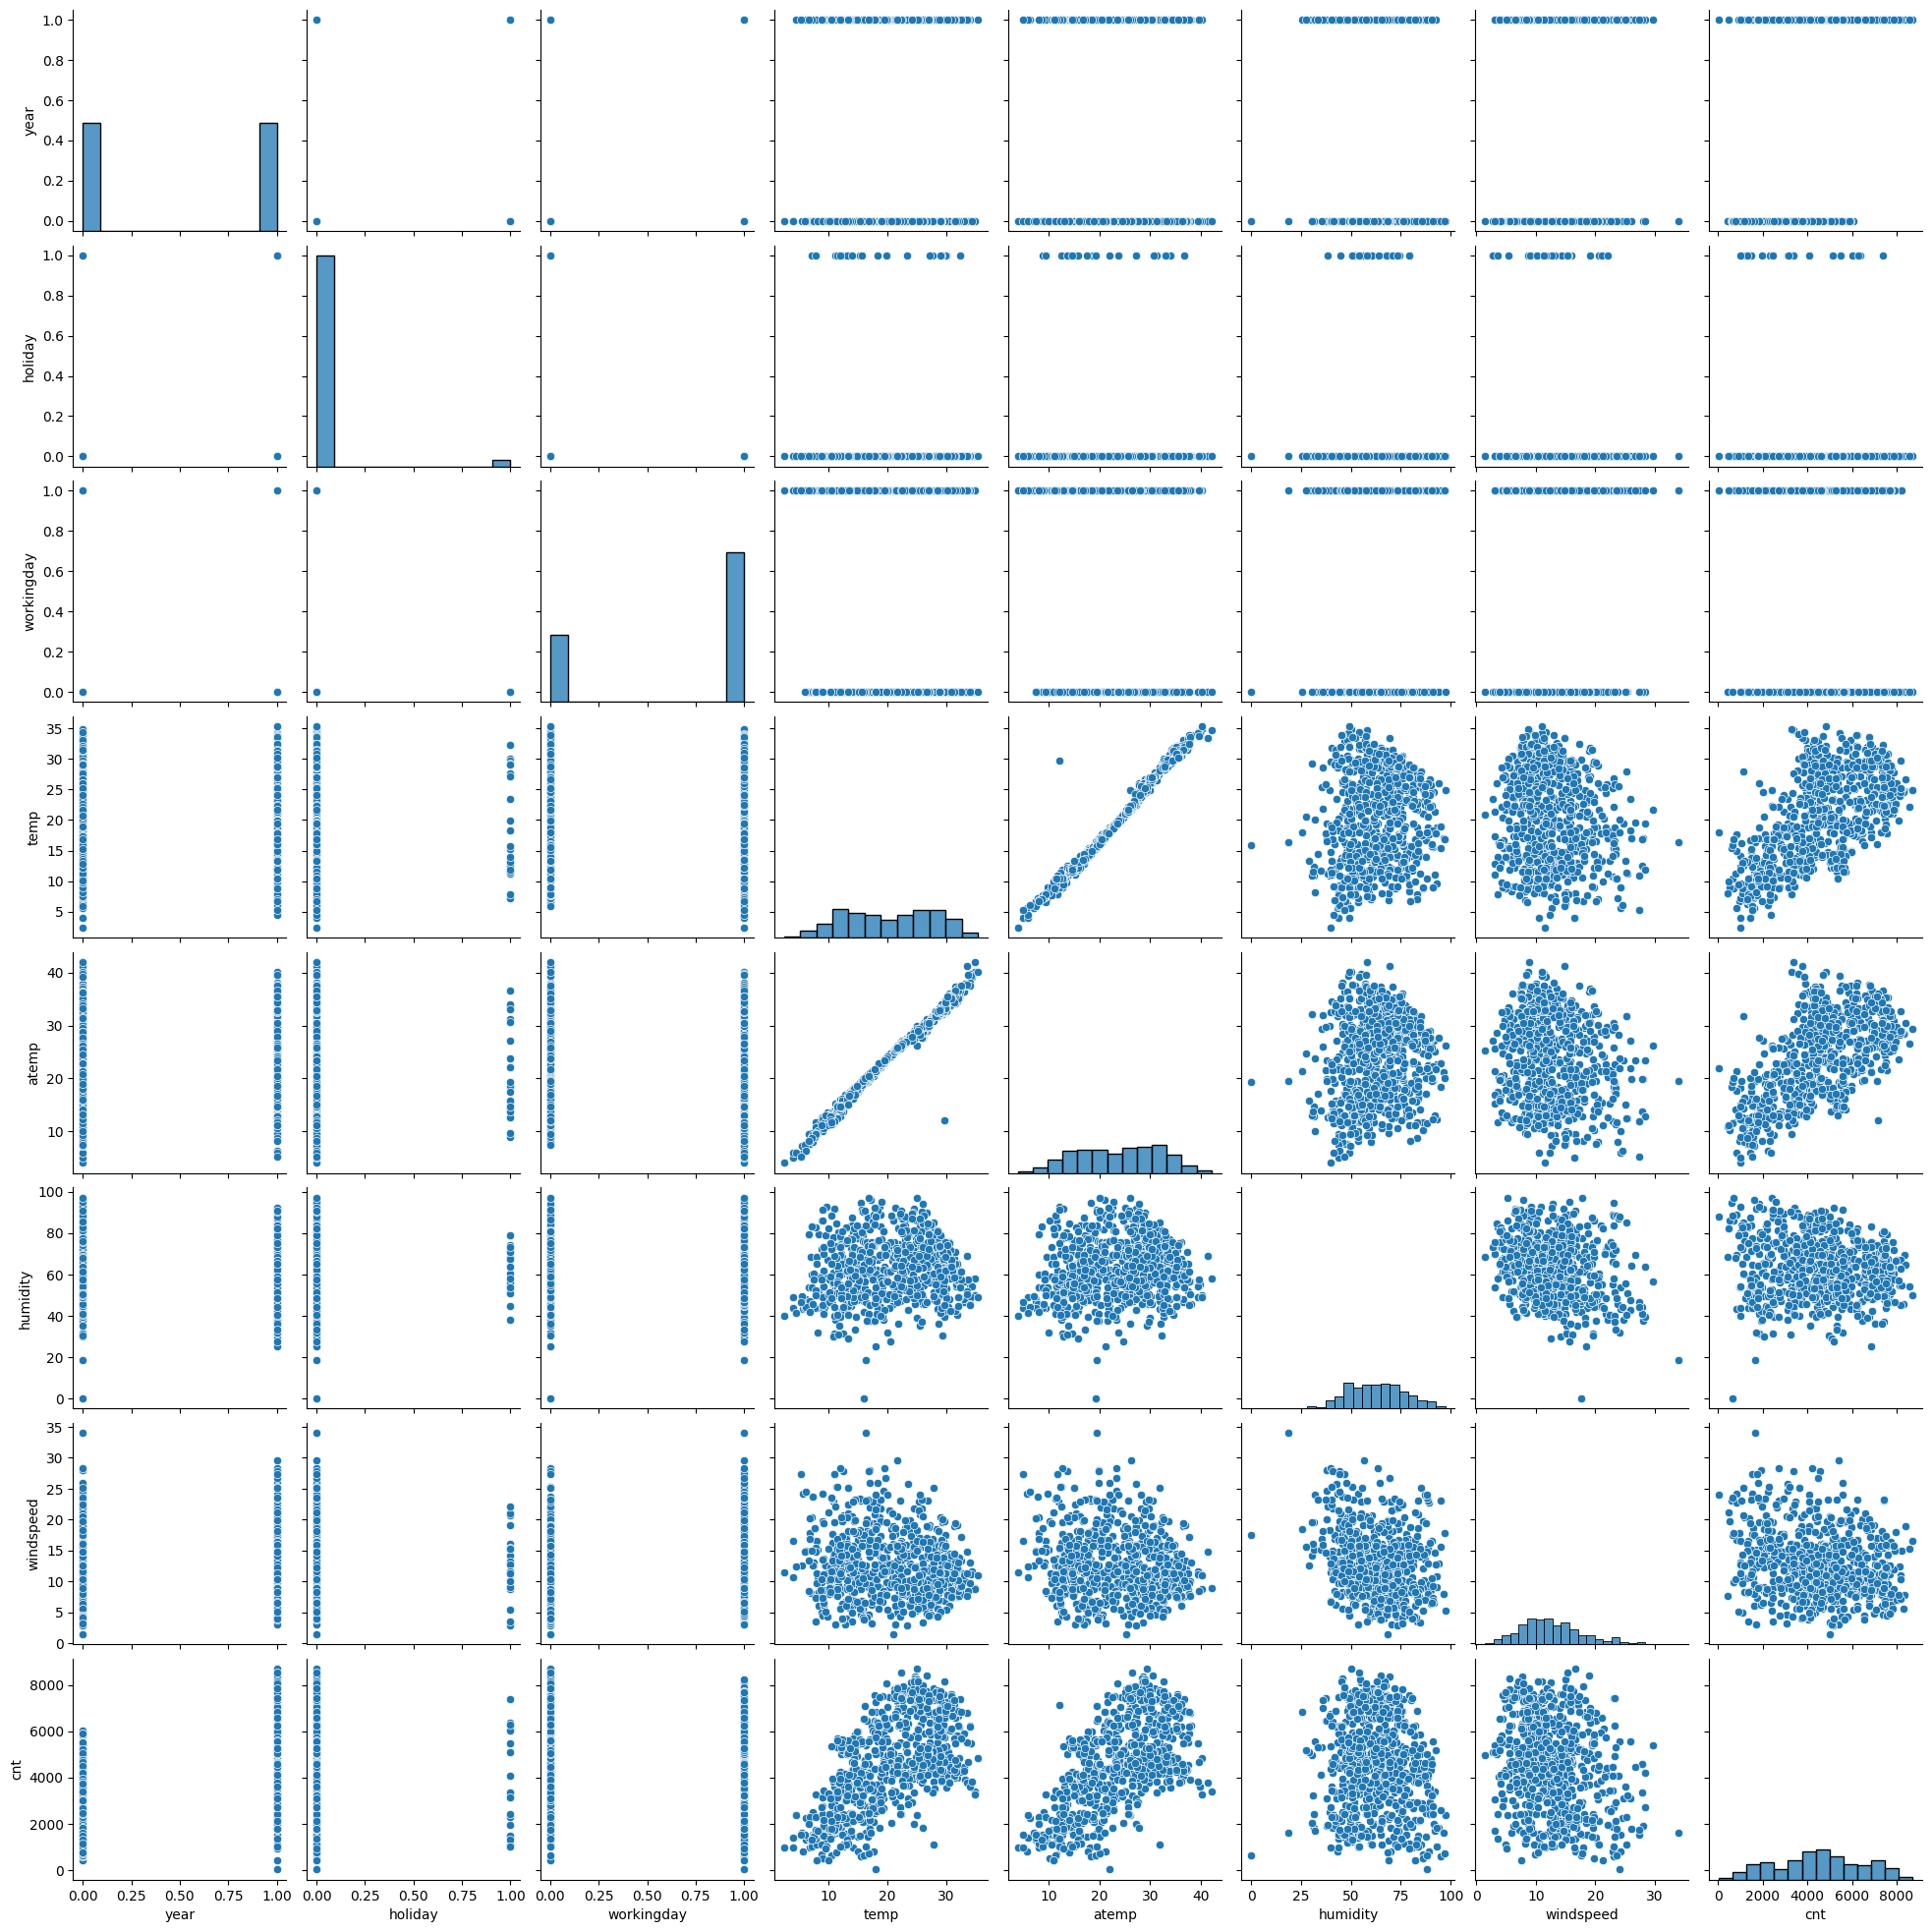

In [38]:
sns.pairplot(data = df)
plt.show()

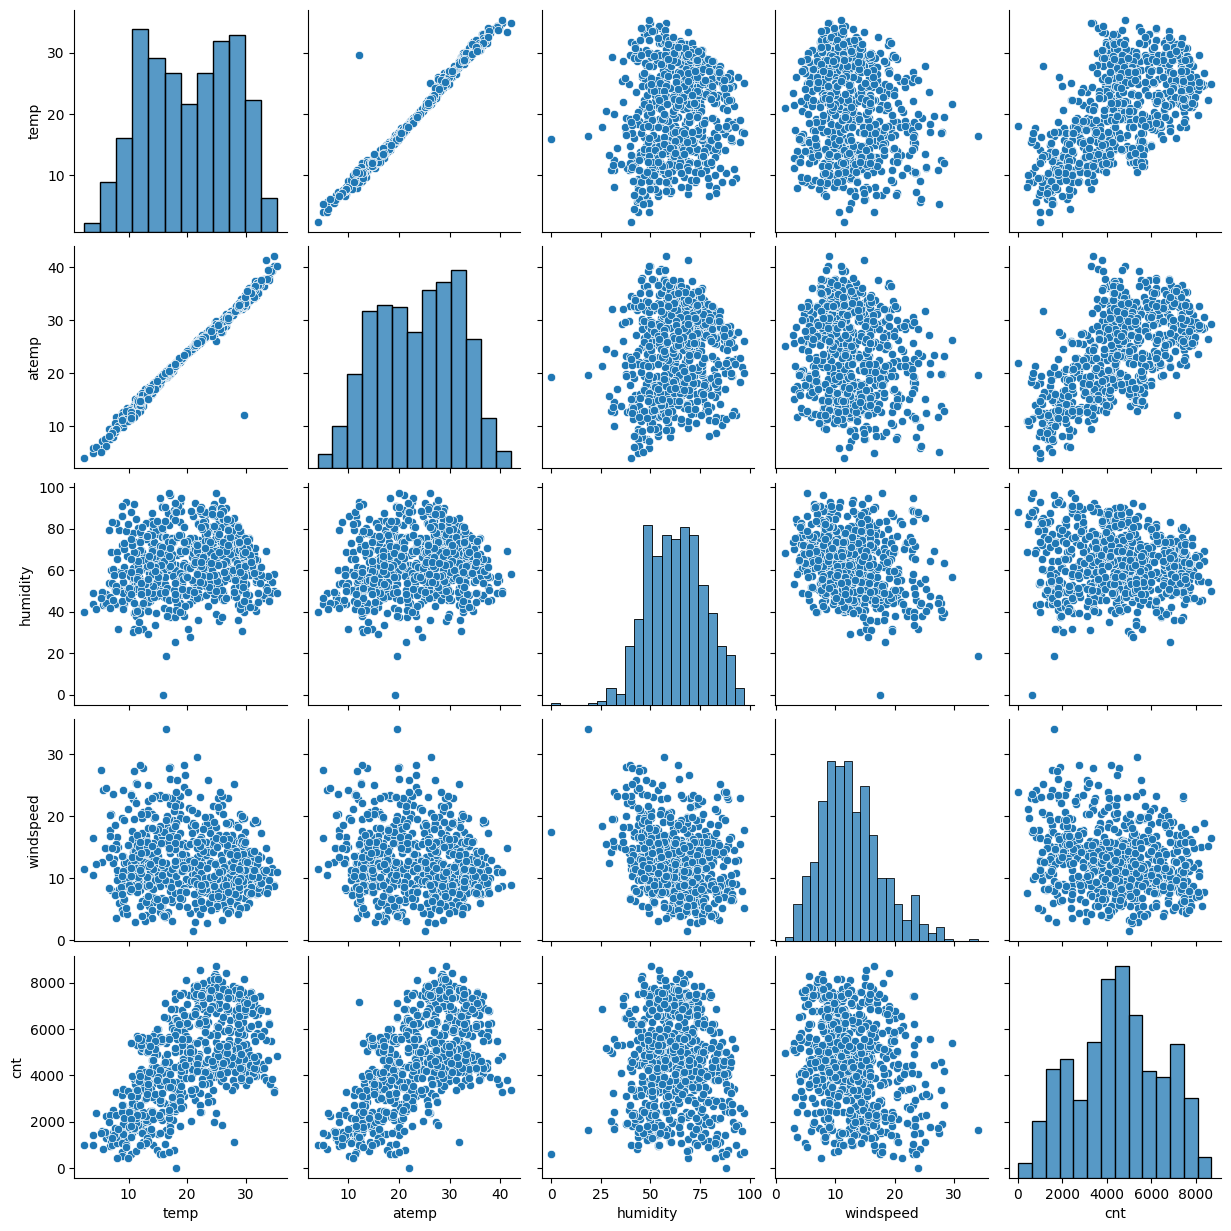

In [39]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

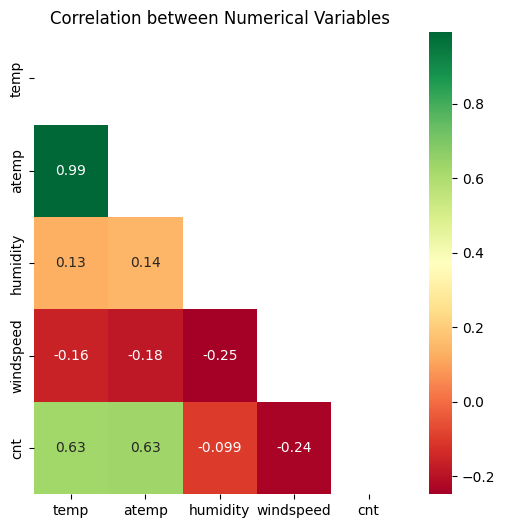

In [40]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

Step 3: Data Prepration

In [41]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [42]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [43]:
df_new = pd.concat([df,months_df, weekdays_df,weathersit_df,seasons_df], axis = 1)

In [44]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,False,False,False,False,False,False,True,True,False,False
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,False,False,False,True,False,False,True,True,False,False
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,False,False,False,False,True,False,False,True,False,False
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,False,False,True,False,False,False,False,True,False,False
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,False,False,False,False,False,False,False,True,False,False


In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    bool   
 13  dec             730 non-null    bool   
 14  feb             730 non-null    bool   
 15  jan             730 non-null    bool   
 16  july            730 non-null    bool   
 17  june            730 non-null    boo

In [46]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [47]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,False,True,True,False,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,True,False,False,True,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


In [48]:
df_new.shape

(730, 30)

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    bool   
 9   dec             730 non-null    bool   
 10  feb             730 non-null    bool   
 11  jan             730 non-null    bool   
 12  july            730 non-null    bool   
 13  june            730 non-null    bool   
 14  mar             730 non-null    bool   
 15  may             730 non-null    bool   
 16  nov             730 non-null    bool   
 17  oct             730 non-null    boo

Step 4: Import the data into Train

In [50]:
# splitting the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [51]:
df_train.shape

(510, 30)

In [52]:
df_test.shape

(220, 30)

In [53]:
# using MinMaxScalar to rescaling the feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,False,False,...,False,True,False,False,False,False,True,True,False,False
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,False,True,...,False,False,False,False,False,False,False,True,False,False
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,False,False,...,False,True,False,False,False,False,True,False,True,False
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,False,False,...,False,True,False,False,False,False,True,False,True,False


In [55]:
# Apply scalar() to all the columns except the 'yes-no' and 'dummy' variables.
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,False,False,...,False,True,False,False,False,False,True,True,False,False
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,False,True,...,False,False,False,False,False,False,False,True,False,False
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,False,False,...,False,True,False,False,False,False,True,False,True,False
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,False,False,...,False,True,False,False,False,False,True,False,True,False


In [57]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


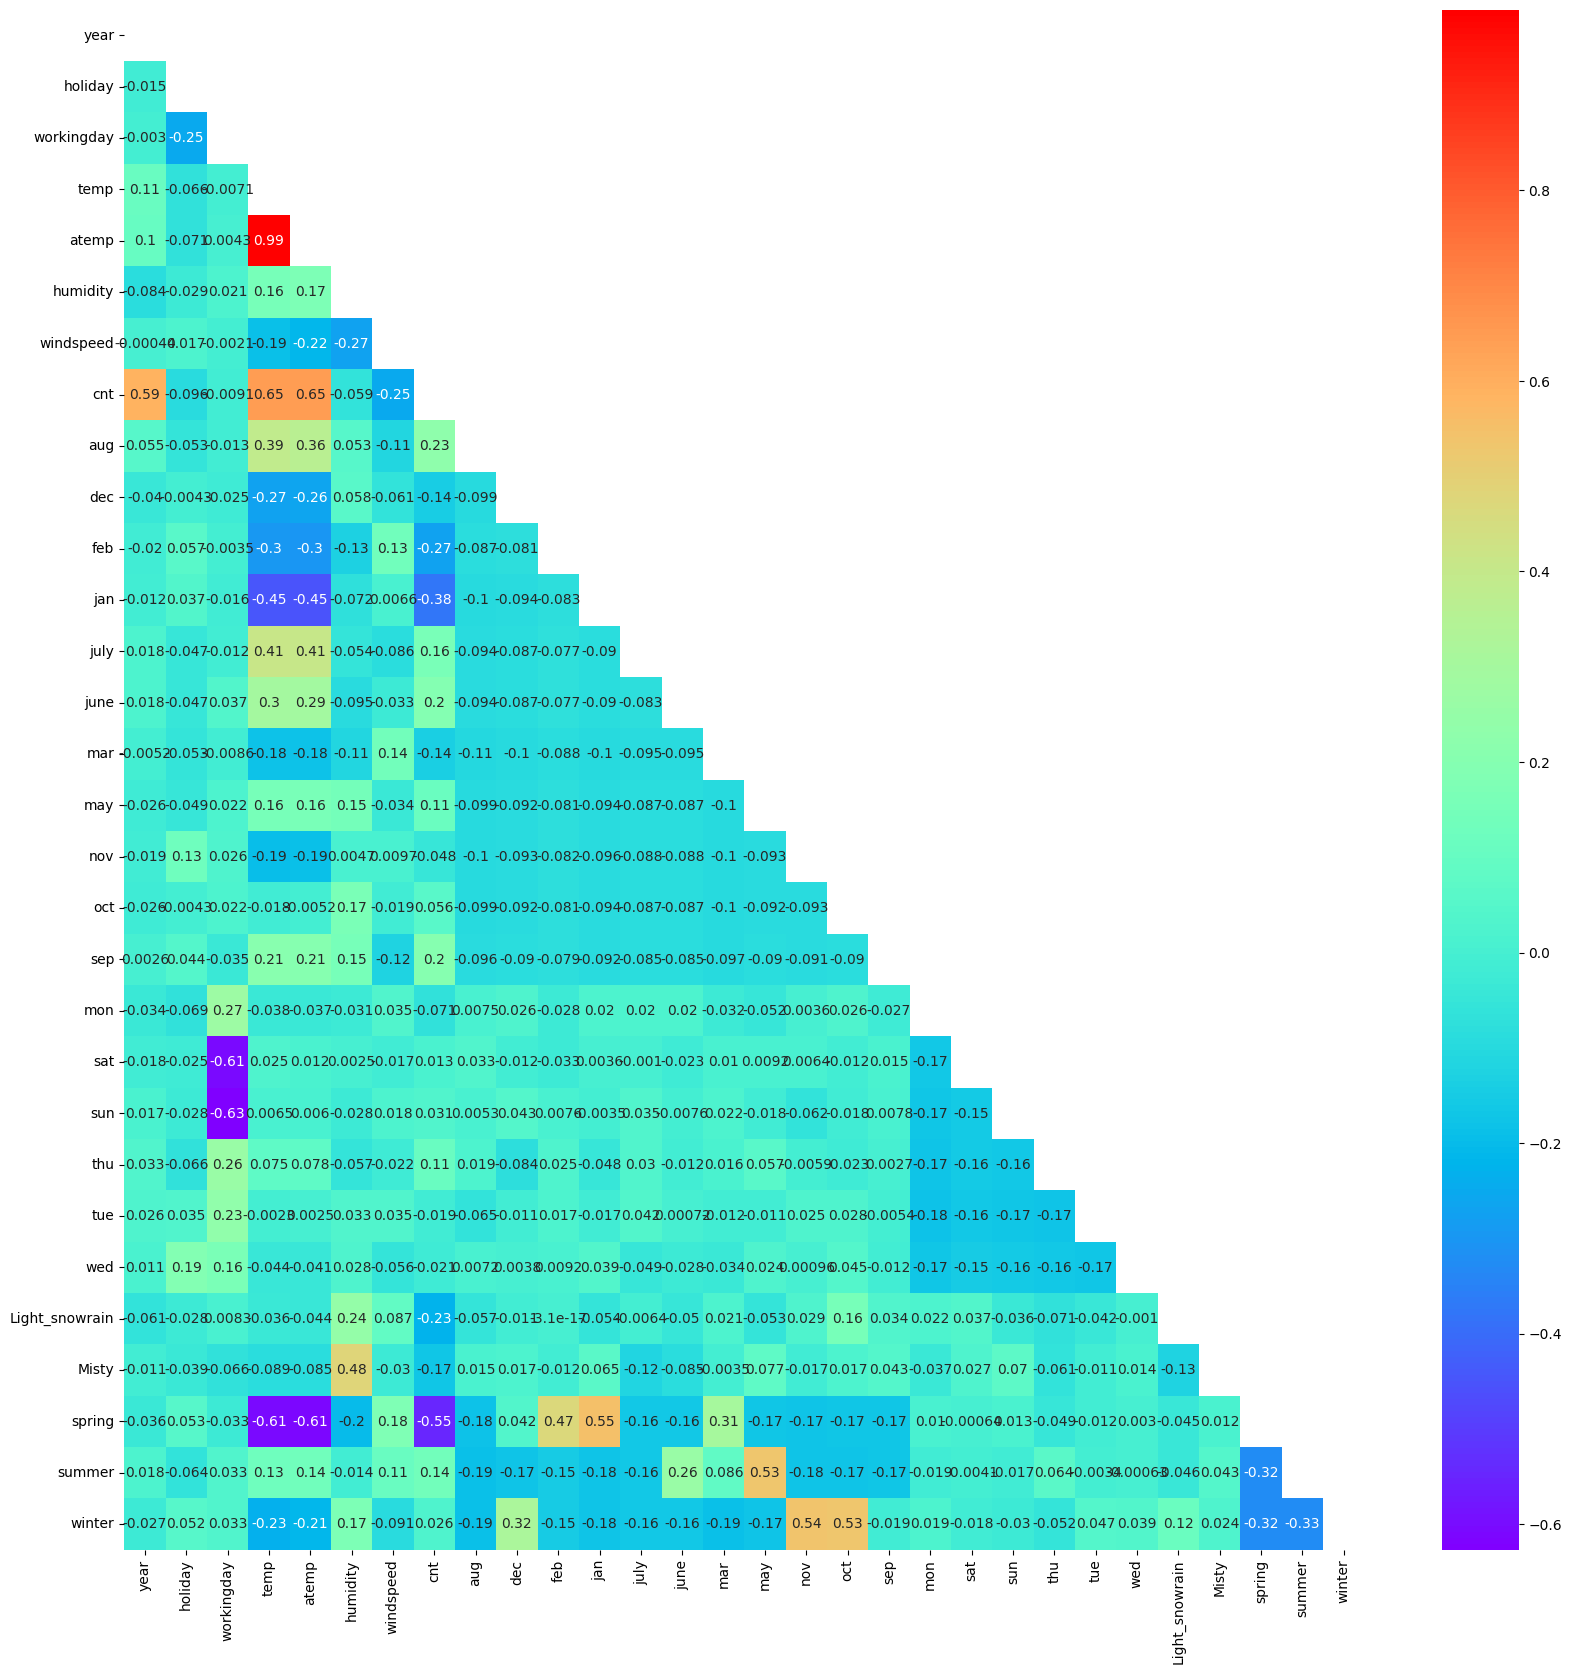

In [58]:
# checking the correlation coffecients to see which variables are highly correlated
plt.figure(figsize = [20,20])
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(),annot = True, cmap ="rainbow", mask = matrix)
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

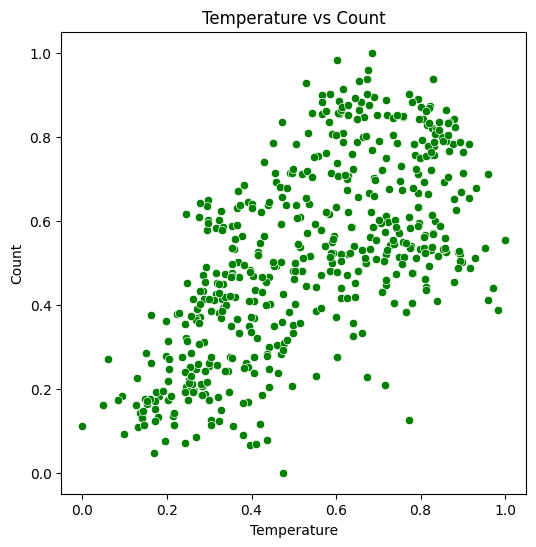

In [59]:
# Visualizing one of the correlation to see the trends via scatterplot
plt.figure(figsize = [6,6])
sns.scatterplot(x = df_train['temp'], y = df_train['cnt'], c = 'green')
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

Visualization confirms the positive correlation between temp and cnt.

In [60]:
from sklearn.feature_selection import RFE

In [61]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train

In [62]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select= 10)
rfe = rfe.fit(X_train, y_train)

In [63]:
# list of variables selected in top 10 list

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 15),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 17),
 ('mar', False, 20),
 ('may', False, 14),
 ('nov', False, 5),
 ('oct', False, 18),
 ('sep', True, 1),
 ('mon', False, 13),
 ('sat', False, 10),
 ('sun', False, 11),
 ('thu', False, 19),
 ('tue', False, 12),
 ('wed', False, 16),
 ('Light_snowrain', True, 1),
 ('Misty', False, 3),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1)]

In [64]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'july', 'sep',
       'Light_snowrain', 'summer', 'winter'],
      dtype='object')

In [65]:
# checking which column has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Misty',
       'spring'],
      dtype='object')

In [66]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  # Convert df.values to float to ensure compatibility with variance_inflation_factor
  vif['VIF'] = [variance_inflation_factor(df.values.astype(float), i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = 'VIF', ascending = False)
  return vif

In [67]:
# dataframe with rfe selected variables
X_train_rfe = df_train[col]

In [68]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,10.29
2,temp,9.29
4,windspeed,3.54
0,year,2.02
8,summer,1.76
9,winter,1.68
5,july,1.55
6,sep,1.29
7,Light_snowrain,1.09
1,holiday,1.04


Humidity shows high VIF value

Step 5: Building a Linear model.

In [72]:
# Convert relevant columns in X_train_rfe to numeric types
X_train_rfe = X_train_rfe.astype(float)

In [73]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          2.79e-186
Time:                        13:40:03   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2682      0.026     10.

In [74]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,year,2.00
7,summer,1.75
4,july,1.51
8,winter,1.43
5,sep,1.28
6,Light_snowrain,1.06
1,holiday,1.03


In [75]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          4.42e-171
Time:                        13:42:47   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0840      0.018      4.

In [77]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,year,2.00
6,summer,1.55
7,winter,1.34
4,sep,1.20
5,Light_snowrain,1.06
1,holiday,1.03


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.


In [78]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          9.22e-172
Time:                        13:46:05   Log-Likelihood:                 454.20
No. Observations:                 510   AIC:                            -890.4
Df Residuals:                     501   BIC:                            -852.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0875      0.017      5.

Step 6: Residual Analysis

In [79]:
X_train_lm_3

,const,year,holiday,temp,windspeed,sep,Light_snowrain,summer,winter
576,1.0,1.0,0.0,0.815169,0.264686,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.442393,0.255342,0.0,0.0,0.0,0.0
728,1.0,1.0,0.0,0.245101,0.663106,0.0,0.0,0.0,0.0
482,1.0,1.0,0.0,0.395666,0.188475,0.0,0.0,1.0,0.0
111,1.0,0.0,0.0,0.345824,0.380981,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,0.0,0.863973,0.187140,0.0,0.0,0.0,0.0
53,1.0,0.0,0.0,0.202618,0.111379,0.0,0.0,0.0,0.0
350,1.0,0.0,0.0,0.248216,0.431816,0.0,0.0,0.0,1.0
79,1.0,0.0,0.0,0.462664,0.529881,0.0,0.0,1.0,0.0


In [80]:
y_train_pred = lr_3.predict(X_train_lm_3)

Normality of error terms

In [95]:
residual = y_train - y_train_pred

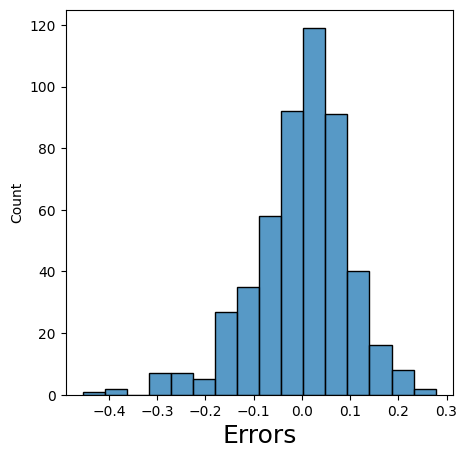

In [86]:
# Plot the histogram of the error terms
plt.figure(figsize = [5,5])
sns.histplot((y_train - y_train_pred), bins = 16)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

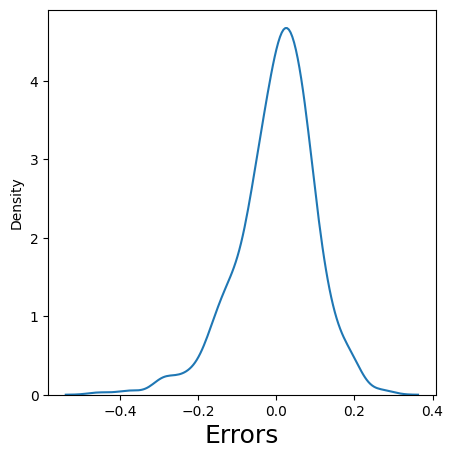

In [89]:
plt.figure(figsize =[5,5])
sns.kdeplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

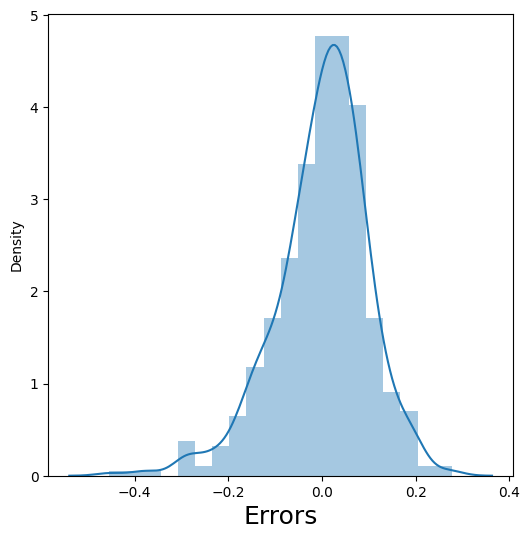

In [83]:
plt.figure(figsize = [6,6])
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

Error terms are normal distribution.

Multi Collinearity

In [90]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,year,2.00
6,summer,1.55
7,winter,1.34
4,sep,1.20
5,Light_snowrain,1.06
1,holiday,1.03


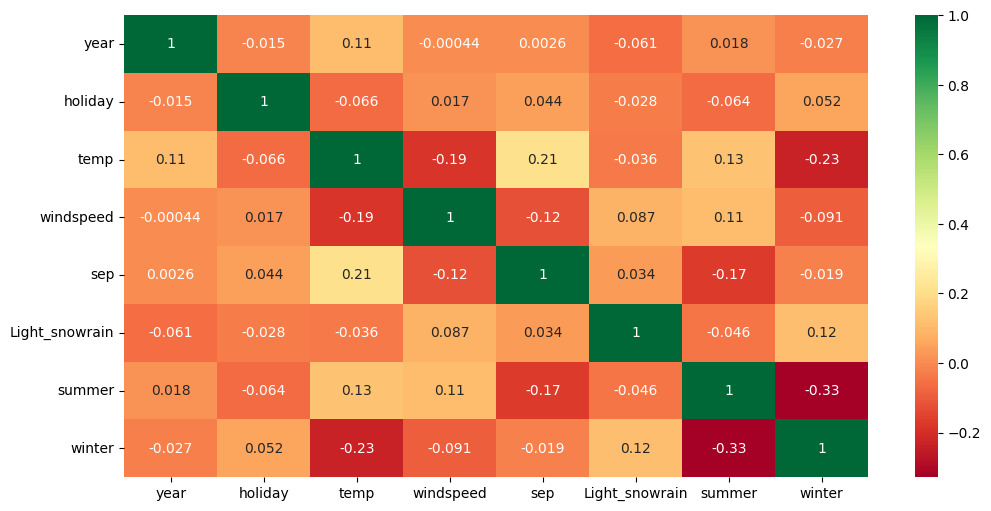

In [92]:
plt.figure(figsize = [12,6])
sns.heatmap(X_train_new.corr(), annot = True, cmap ="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

Linearity

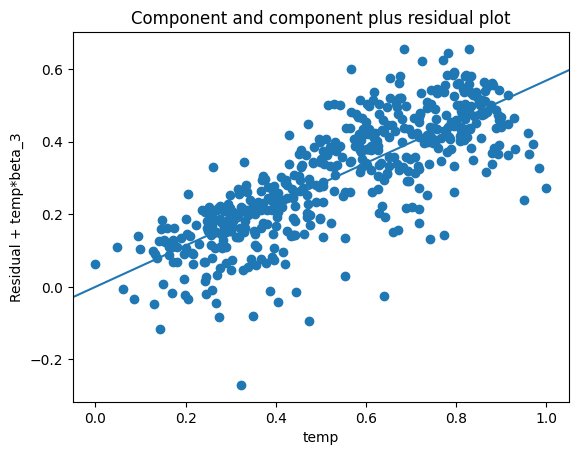

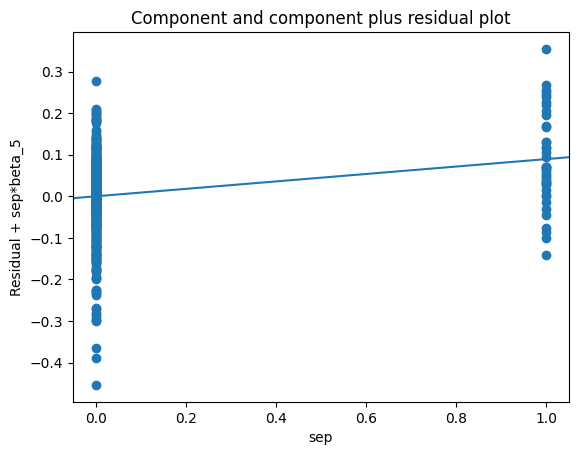

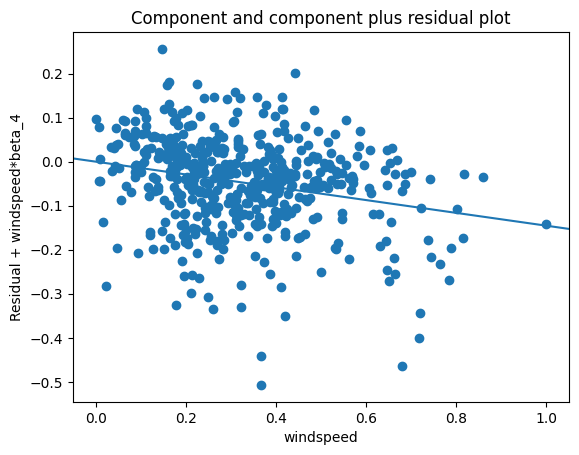

In [94]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_3, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_3, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

Homoscedasticity

In [98]:
y_train_pred = lr_3.predict(X_train_lm_3)
residual = y_train - y_train_pred

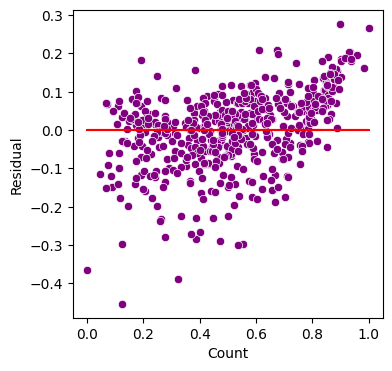

In [101]:
plt.figure(figsize = [4,4])
sns.scatterplot(x = y_train, y = residual, c = 'purple')
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

Step 7: Making Predictions Using the Final Model

In [102]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,False,False,...,False,False,False,False,True,False,True,False,False,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,False,False,...,False,False,True,False,False,False,False,False,True,False
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,False,False,...,True,False,False,False,False,False,True,False,False,True
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,True,False,...,False,False,False,False,False,False,False,False,False,False
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,False,False,...,True,False,False,False,False,False,False,False,True,False


In [103]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [104]:
y_test = df_test.pop('cnt')
X_test = df_test

In [105]:
col1 = X_train_new.columns
X_test = X_test[col1]
X_test_lm_3 = sm.add_constant(X_test)

In [106]:
y_pred = lr_3.predict(X_test_lm_3)

In [107]:
r2 = r2_score(y_test, y_pred)

In [108]:
r2

0.7720731949554798

In [109]:
round(r2, 4)

0.7721

Step 8: Model Evaluation

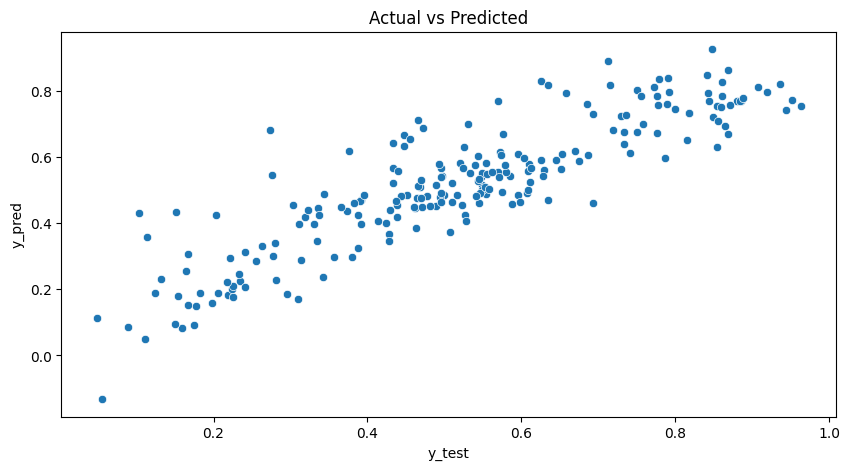

In [110]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize = [10,5])
sns.scatterplot(x = y_test, y = y_pred)
plt. title('Actual vs Predicted')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [112]:
round(lr_3.params , 4)

,0
const,0.0875
year,0.2334
holiday,-0.0867
temp,0.5682
windspeed,-0.1455
sep,0.0895
Light_snowrain,-0.2535
summer,0.0812
winter,0.1261


In [113]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7634


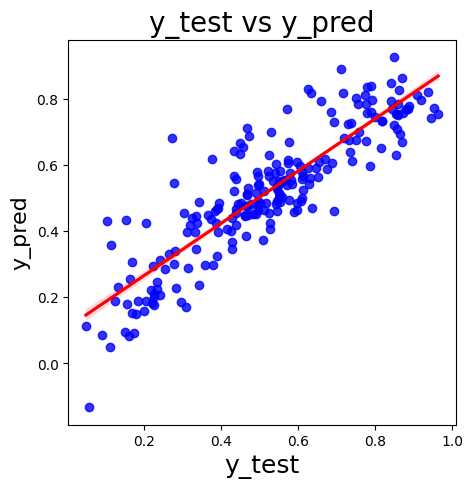

In [115]:
# Visualizing the fit on the test data
# plotting a Regression plot
plt.figure(figsize = [5,5])
# Convert y_test and y_pred to numeric types
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred = pd.to_numeric(y_pred, errors='coerce')
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()